# Lab1. Linear Regression (with pure python)  

이 실습에서는 Regression Problem에 대해서 Linear Regression Hypothesis를 통해 풀어볼 겁니다. `pytorch`, `numpy`, `pandas` 등을 하나도 안쓰고 구현해보는게 본 실습의 묘미입니다.


**이 문서를 구글 Colab에서 쉽게 실행해보는법**  
1. [제가 미리 만들어놓은 이 링크](https://colab.research.google.com/github/heartcored98/Standalone-DeepLearning/blob/master/Lec1/Lab1_linear_regression.ipynb)를 눌러 본 .ipynb 파일을 구글 Colab에서 바로 열 수 있습니다. 이때 구글에 로그인을 해야 합니다.
2. 아무 셀이나 선택한 후 `Ctrl+Enter`를 눌러 실행해보면 **[경고: 이 노트는 Google에서 작성하지 않았습니다]**라고 뜨는데 `실행 전에 모든 런타임 재설정`을 선택한 채로 `무시하고 계속하기`를 눌러줍니다.  
3. **[모든 런타임 재설정]** 이 뜰 텐데 `예`를 눌러줍니다.  
4. 잠시 구글 서버의 배치가 되면서 우상단에 `연결중` -> `초기화중` -> `연결됨`이 뜨면서 실행이 가능한 상태가 됩니다.  

**이 문서를 구글 Colab에서 어렵게 실행해보는법**  
1. 구글 Colab 문서를 하나 만들어줍시다. 
2. 본 문서에 있는 셀에 있는 코드를 드래그 한 후 `Ctrl+C`를 눌러줍시다.  
3. 구글 Colab 문서에 가서 `Ctrl+V`를 눌러줍시다.
4. 모든 셀이 다 복사될 때까지 1~3 무한반복!  

**구글 Colab에서 실습후 저장하는법**  
**쉽게 실행보는법**을 따라오셨다면 Colab에서 임시 노트북으로 열리기 때문에 `파일`->`드라이브로 저장`을 눌러서 여러분의 구글 드라이브에 저장하거나 `파일` -> `.ipynb 다운로드`를 눌러서 다운로드 해줍시다.   

*Written by. 조재영(whwodud9@kaist.ac.kr) 2019.01.17 *

# 1. Data Generation  (Preparation)

Linear Regression 실습에 사용할 공부한 시간에 따른 성적 데이터를 만들어봅시다.

In [1]:
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Y = [1, 1, 2, 4, 5, 7, 8, 9, 9, 10]

X, Y 데이터를 2D 평면 상에 시각화 해볼까요?

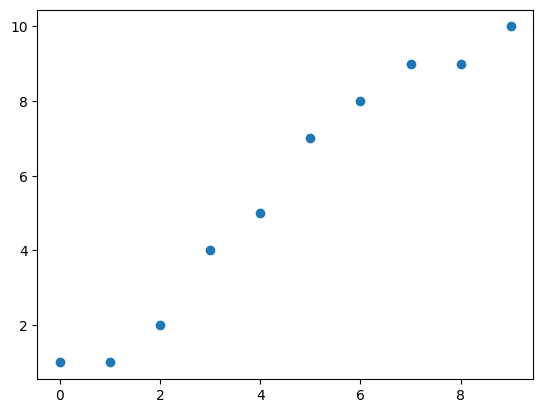

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.show()

# 2. Hypothesis Define (Model Define)  

Linear Regression 시에 활용하는 f(x) = Wx + b에서
b가 없는 간단한 버전인 f(x) = Wx 라는 모델(가설)을 구현해봅니다.

In [3]:
class H():
  
    def __init__(self, w): 
    # 처음에 모델의 파라미터(학습을 통해 최적화될 값) w를 인풋으로 받아 모델을 만들어줍시다.
        self.w = w
    
    def forward(self, x):
    # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴합니다.
        return self.w * x
    
h = H(4) # 이제 f(x) = 4x 라는 모델이 만들어졌습니다.
pred_y = h.forward(5) # x=5 라는 인스턴스(샘플)이 인풋으로 들어왔을 때 f(5) = 4 x 5 를 통해서 20 이 정상적으로 출력되는 것을 확인할 수 있습니다.
print('value of f(5) :', pred_y)
print('value of w :', h.w) # 모델 h의 내부 파라미터를 출력했을 때 4가 정상적으로 출력되는 것도 확인할 수 있습니다.

value of f(5) : 20
value of w : 4


# 3. Cost Function Define (Loss Function Define)  

Regression Problem 에서의 Cost Function을 작성해봅시다.

In [4]:
def cost(h, X, Y):
    error = 0
    for i in range(len(X)):
        error += (h.forward(X[i]) - Y[i])**2
    error = error / len(X)
    return error

h = H(4) # 위에서 이미 한번 생성했지만 다시 생성해봅니다.
print('cost value when w = 4 :', cost(h, X, Y)) # f(x) = 4 x 인 현재의 모델은 저희가 관측한 데이터셋에 대해서 222.2 라는 cost를 가지네요 (상당히 크죠?)

def better_cost(pred_y, true_y):
  # 이 코드가 조금 더 나은 버전이라고 할 수 있는데요. 위에 있는 cost(h, X, Y)에서는 cost function 안에서 H(x)를 계산해야 하는 불편함이 있기 때문에
  # 일반적으로 코드를 짤 때 cost function(loss function)들은 모델이 예측한 y 값들의 리스트와 실제 y 값들의 리스트만 받아서 계산하는 구조를 취합니다.
  
    error = 0
    for i in range(len(X)):
        error += (pred_y[i] - true_y[i])**2
    error = error / len(X)
    return error

pred_y = [ h.forward(X[i]) for i in range(len(X)) ] # 미리 모델 h를 통해서 각 x 인스턴스에 대한 y 값을 예측해봅시다. 
print('cost value with better code structure :', better_cost(pred_y, Y)) # 위와 같이 똑같이 222.2 라는 값이 나오는 것을 확인할 수 있죠. 잘 작동하는 군요

cost value when w = 4 : 222.2
cost value with better code structure : 222.2


### Cost Surface Visualization 

위에서 w=4 인 경우에 대해서 cost를 확인해보았는데요. 이번엔 다양한 w에 따라서 cost 값이 어떻게 바뀌는지 확인해보겠습니다.  
w = 1.25 정도 쯤에서 cost 값이 최소가 되는 듯한 양상을 보이네요

[-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[3582.2, 3269.825, 2971.7, 2687.825, 2418.2, 2162.825, 1921.7, 1694.825, 1482.2, 1283.825, 1099.7, 929.825, 774.2, 632.825, 505.7, 392.825, 294.2, 209.825, 139.7, 83.825, 42.2, 14.825, 1.7, 2.825, 18.2, 47.825, 91.7, 149.825, 222.2, 308.825, 409.7, 524.825, 654.2, 797.825, 955.7, 1127.825, 1314.2, 1514.825, 1729.7, 1958.825]


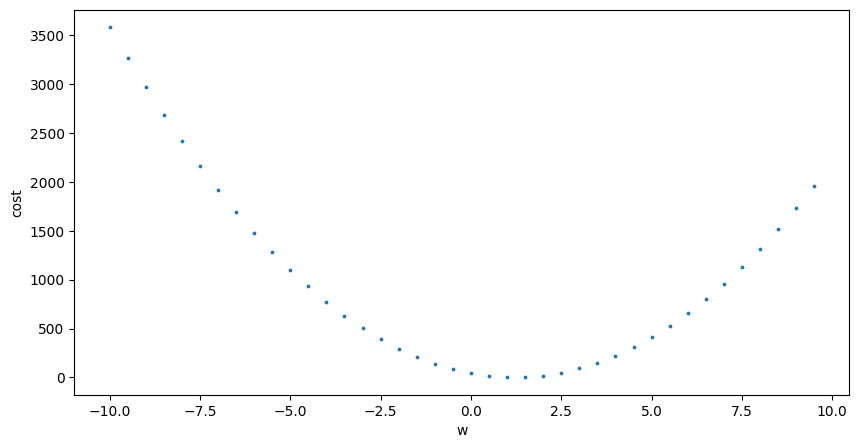

In [5]:
list_w = []
list_c = []
for i in range(-20, 20):
    w = i * 0.5
    h = H(w)
    c = cost(h, X, Y)
    list_w.append(w)
    list_c.append(c)
    
print(list_w) # w 값들이 잘 들어갔는지 확인해봅시다.
print(list_c) # c 값들이 잘 들어갔는지 확인해봅시다.

plt.figure(figsize=(10,5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=3)

# Gradient Descent Algorithm  

이제 특정 w 근방에서의 w에 대한 cost 의 편미분(지금은 변수가 하나라 그냥 미분과 다를바 없지만)을 구해보겠습니다.  

여기서는 두가지 방식으로 그라디언트를 구해보겠습니다. 

첫번째 방식은 수치해석적으로 w=4 인 지점과 w=4 + eps 인 지점에서의 cost 값을 각각 구한 뒤 두 값의 차이를 통해 그라이디언트를 구하는 방식입니다.   

두번째 방식은 cost function을 w로 편미분한 공식을 통해 바로 특정 w 에서의 그라디언트를 구하는 방식입니다.

### Compare two approach in order to compute Gradient (Analytic, Formula)

1.2105213157896242 0.43684210597565787 1.2105263157894737 0.43684210526315803


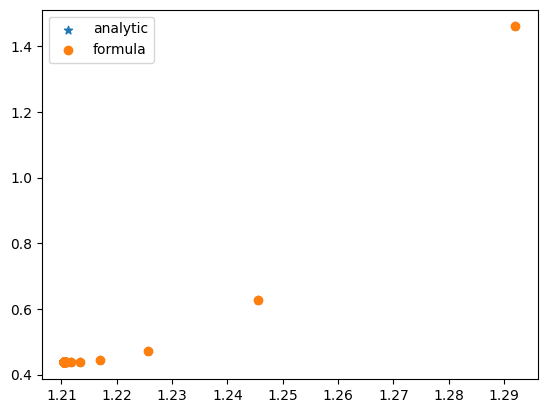

In [6]:
def cal_grad(w, cost): # 수치해석적으로 그라디언트를 근사해봅니다.
    h = H(w)
    cost1 = cost(h, X, Y)
    eps = 0.00001 
    h = H(w+eps) # w에서 epsilon 만큼 떨어진 부분에서도 cost를 구해줍니다.
    cost2 = cost(h, X, Y)
    dcost = cost2 - cost1
    dw = eps
    grad = dcost / dw
    return grad, (cost1+cost2)*0.5

def cal_grad2(w, cost): # 편미분한 공식에 바로 대입하여 그라디언트를 근사해봅니다. 
    h = H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2 * (h.forward(X[i]) - Y[i]) * X[i]
    grad = grad / len(X)
    c = cost(h, X, Y)
    return grad, c


# 두 방식을 이용해서 w = 1.4 라는 지점에서 모델을 각각 초기화한 뒤에 Gradient Descent Algorithm 을 통해 내려갔을 때 거의 같은 결과가 나오는지 확인해봅시다.
w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100): # 총 100번의 Iteration(반복)을 통해서 학습을 진행해봅시다.
    grad, mean_cost = cal_grad(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)
    
print(w1, mean_cost, w2, mean_cost2) # 100번의 학습이 끝난 뒤에 w1 과 w2 를 출력해보니 둘다 1.21 정도로 비슷한 값으로 수렴한 것을 확인할 수 있습니다.
  
# 매 Iteration에서의 w 값과 cost 값을 그래프 상에 찍어보면 둘이 거의 정확하게 같은 지점을 통과하므로 초록색 동그라미가 파란색 별표를 가리네요
plt.scatter(list_w1, list_c1, label='analytic', marker='*')
plt.scatter(list_w2, list_c2, label='formula')
plt.legend()


### Compare Training process of Two Models Initialized from Different w value

1.2105263157894737 0.43684210526315803 1.2105263157894737 0.43684210526315803


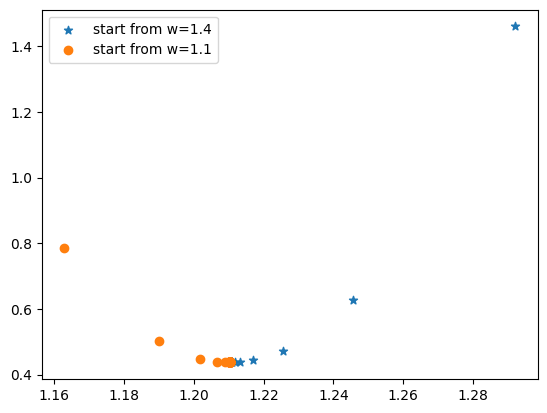

In [7]:
# 편미분 공식을 활용해서 Gradient Descent를 진행하되 서로 다른 w 지점으로 초기화 되었을 때 학습 양상을 확인해봅시다
w1 = 1.4
w2 = 1.1
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100): # 총 100번의 Iteration(반복)을 통해서 학습을 진행해봅시다.
    grad, mean_cost = cal_grad2(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)
    
print(w1, mean_cost, w2, mean_cost2) # 100번의 학습이 끝난 뒤에 w1 과 w2 를 출력해보니 둘다 1.21 정도로 비슷한 값으로 수렴한 것을 확인할 수 있습니다.
  
# 서로 다른 지점으로부터 시작하였더라도 학습이 진행됨에 따라 둘 다 같은 파라미터(w=1.21)로 수렴하는 양상을 확인할 수 있습니다.
plt.scatter(list_w1, list_c1, label='start from w=1.4', marker='*')
plt.scatter(list_w2, list_c2, label='start from w=1.1')
plt.legend()